## HW 11 - Data fitting with various functions - Due FRIDAY 12 Nov , 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LOGG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

def mcFit2(func, x, y, y_err, x_err, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, y_err, x_err,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, y_err, x_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

In [2]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
#fig = plt.figure(figsize=(20,15))
#ax = fig.add_subplot(111)
#ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

#ax.xaxis.set_tick_params(labelsize=20)
#ax.yaxis.set_tick_params(labelsize=20)
#plt.show()

# Set One: TEFF vs. LogG

LINEAR:  0.0011989117573397287 -3.337214116264044
POLY2:  -2.0670380559150317e-07 0.003284486003572641 -8.428336911732233
POLY3:  2.2632307773192305e-12 -2.4468943678404575e-07 0.0034854561401924523 -8.765926536135842


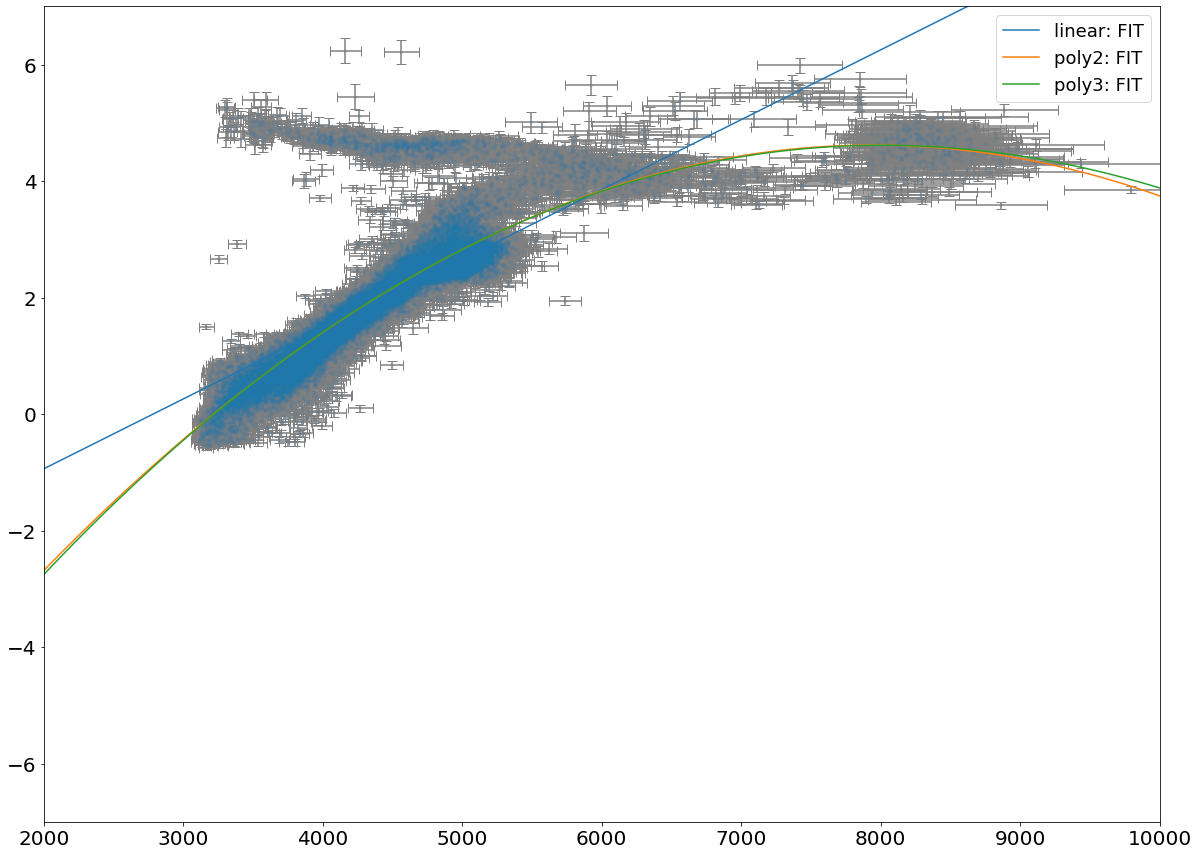

<Figure size 432x288 with 0 Axes>

In [3]:
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDED CUTS
ct2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLAT'] < 1) & (star['GLAT'] > -1) &\
      (star['TEFF'] > 1000) & (star['LogG'] > -1000)
cut2 = np.where(ct2)[0]

## create figures

fig_2 = plt.figure(figsize=(20,15)) ## figure plot
ax_2 = fig_2.add_subplot(111)

## plot the raw data and error bars

ax_2.scatter(star['TEFF'][cut2], star['LogG'][cut2],s=10,alpha=0.1) 
ax_2.errorbar((star['TEFF'][cut2]),star['LogG'][cut2], xerr=(star['TEFF_ERR'][cut2]), yerr=(star['LogG_ERR'][cut2]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_2.xaxis.set_tick_params(labelsize=20)
ax_2.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope, intercept = mcFit2(linear, star['TEFF'][cut2], star['LogG'][cut2], star['LogG_ERR'][cut2], star['TEFF_ERR'][cut2])
print("LINEAR: ",slope, intercept)

## Polynomial degree 2 Fit: 

param1, param2, param3 = mcFit3(poly2, star['TEFF'][cut2], star['LogG'][cut2], star['LogG_ERR'][cut2], star['TEFF_ERR'][cut2])
print("POLY2: ", param1, param2, param3)

## Polynomial degree 3 Fit:

param1_2, param2_2, param3_2, param4_2 = mcFit4(poly3, star['TEFF'][cut2], star['LogG'][cut2], star['LogG_ERR'][cut2], star['TEFF_ERR'][cut2])
print("POLY3: ", param1_2, param2_2,param3_2, param4_2)

## Exponential Fit: FORGET IT!!!

#(param1_3, param2_3, param3_3, param4_3 = mcFit4(exponential, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF_ERR'][cut2], star['LogG_ERR'][cut2]))
#(print("EXPONENTIAL: ", param1_3, param2_3,param3_3, param4_3))

## Cosine Fit: FORGET IT!!!!

#param1_4, param2_4, param3_4, param4_4 = mcFit4(cosfit, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF_ERR'][cut2], star['LogG_ERR'][cut2], p0 = [6.8,0.0003,-2.2,-2])
#print("COSFIT: ", param1_4, param2_4,param3_4, param4_4)
    
## Log Fit: FORGET IT!!!

#param1_5, param2_5, param3_5, param4_5 = mcFit4(logfit, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF_ERR'][cut2], star['LogG_ERR'][cut2], p0=[5.5,0.008,0,-18])
#print("LOGFIT: ", param1_5, param2_5, param3_5, param4_5)


# PLOT FITS
x_plot = np.linspace(0,10000,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_2.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit: 
ax_2.plot(x_plot,poly2(x_plot, param1, param2, param3), label='poly2: FIT')
#poly3 fit: 
ax_2.plot(x_plot,poly3(x_plot, param1_2, param2_2, param3_2, param4_2), label='poly3: FIT')


#exponential fit: FORGET IT!!!
#ax_2.plot(x_plot,exponential(x_plot, param1_3, param2_3, param3_3, param4_3), label='Exponential: FIT')

#cosfit plot: FORGET IT!!!
#ax_2.plot(x_plot,cosfit(x_plot, param1_4, param2_4, param3_4, param4_4), label='Cosfit: FIT')  

#logfit plot: FORGET IT!!!
#ax_2.plot(x_plot,logfit(x_plot, param1_5, param2_5, param3_5, param4_5), label='Logfit: FIT')

ax_2.set_xlim(2000,10000)
ax_2.set_ylim(-7, 7)

plt.legend(loc='best', fontsize=18)
plt.show()

## save the graph

plt.savefig("TEFF vs. LogG.png") 

## Conclusion:
### The Poly3 fit is best one among those tested for the above data.

# Set Two: FE_H vs. O_FE

LINEAR:  -0.21681324261425167 0.040406791464711156
POLY2:  -0.08031612940008319 -0.30704196422115626 0.03320705703513221
POLY3:  0.018404816097322144 -0.04163561419931115 -0.2941068323056646 0.03228067021484615
COSFIT:  0.2571299038367426 1.102508394409014 1.6750203760539988 0.05712837785638388


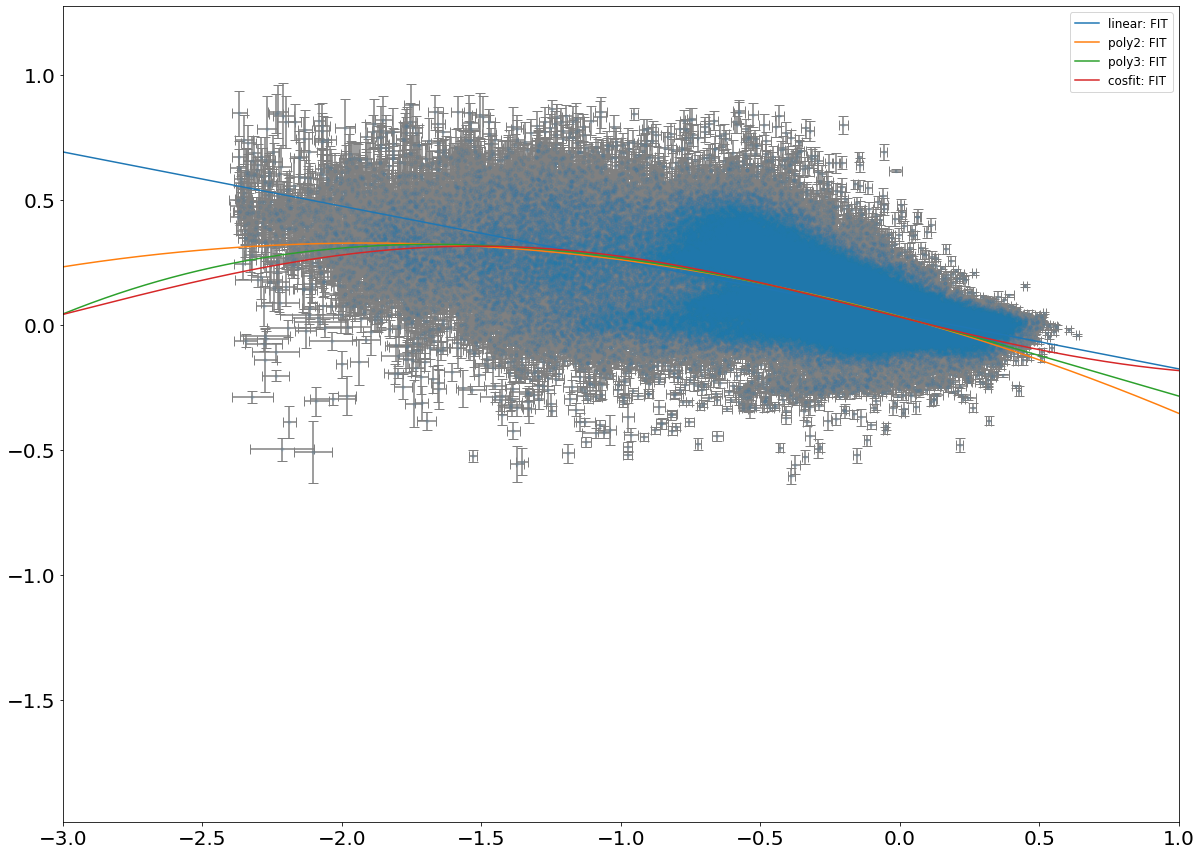

<Figure size 432x288 with 0 Axes>

In [4]:
ct3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['FE_H'] > -100) & (star['O_FE'] > -100) &\
      ((star['GLAT'] < -10) | (star['GLAT'] > 10))
      
cut3 = np.where(ct3)[0]

## create figures

fig_3 = plt.figure(figsize=(20,15)) ## figure plot
ax_3 = fig_3.add_subplot(111)

## plot the raw data and error bars

ax_3.scatter(star['FE_H'][cut3], star['O_FE'][cut3],s=10,alpha=0.1) 
ax_3.errorbar((star['Fe_H'][cut3]),star['O_FE'][cut3], xerr=(star['Fe_H_ERR'][cut3]), yerr=(star['O_FE_ERR'][cut3]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_3.xaxis.set_tick_params(labelsize=20)
ax_3.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_2, intercept_2 = mcFit2(linear, star['Fe_H'][cut3], star['O_FE'][cut3], star['O_FE_ERR'][cut3], star['Fe_H_ERR'][cut3])
print("LINEAR: ",slope_2, intercept_2)

## Polynomial degree 2 Fit: 

param2_1_1, param2_2_1, param2_3_1 = mcFit3(poly2, star['Fe_H'][cut3], star['O_FE'][cut3], star['O_FE_ERR'][cut3], star['Fe_H_ERR'][cut3])
print("POLY2: ", param2_1_1, param2_2_1, param2_3_1)

## Polynomial degree 3 Fit:

param2_1_2, param2_2_2, param2_3_2, param2_4_2 = mcFit4(poly3, star['Fe_H'][cut3], star['O_FE'][cut3], star['O_FE_ERR'][cut3], star['Fe_H_ERR'][cut3])
print("POLY3: ", param2_1_2, param2_2_2, param2_3_2, param2_4_2)

## Cosine Fit: 

param2_1_3, param2_2_3, param2_3_3, param2_4_3 = mcFit4(cosfit, star['Fe_H'][cut3], star['O_FE'][cut3], star['O_FE_ERR'][cut3], star['Fe_H_ERR'][cut3])
print("COSFIT: ", param2_1_3, param2_2_3, param2_3_3, param2_4_3)

## Exponential Fit: 

#param2_1_4, param2_2_4, param2_3_4, param2_4_4 = mcFit4(exponential, star['Fe_H'][cut3], star['O_FE'][cut3], star['O_FE_ERR'][cut3], star['Fe_H_ERR'][cut3])
#print("EXPONENTIAL: ", param1_3, param2_3,param3_3, param4_3)

# PLOT FITS
x_plot_2 = np.linspace(-5,1,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_3.plot(x_plot_2,linear(x_plot_2, slope_2, intercept_2), label='linear: FIT')
#poly2 fit: 
ax_3.plot(x_plot_2,poly2(x_plot_2, param2_1_1, param2_2_1, param2_3_1), label='poly2: FIT')
#poly3 fit: 
ax_3.plot(x_plot_2,poly3(x_plot_2, param2_1_2, param2_2_2, param2_3_2, param2_4_2), label='poly3: FIT')
#cosine fit:
ax_3.plot(x_plot_2,cosfit(x_plot_2, param2_1_3, param2_2_3, param2_3_3, param2_4_3), label='cosfit: FIT')

ax_3.set_xlim(-3,1)

plt.legend(loc='best', fontsize=12)
plt.show()

## save the graph

plt.savefig("FE_H vs. O_FE 1.png") 

## Conclusion:
### The linear fit appears to be the best among those tested for the above data.

# Set Three: FE_H vs. O_FE (With different constraints)

LINEAR:  -0.16361399813095268 0.041054744046624486
POLY2:  0.018865104224244464 -0.1554603381248169 0.04003960564156443
POLY3:  0.11449139082733617 0.16715363760341106 -0.14838992349571378 0.031247041080401605
COSFIT:  0.2571299038367426 1.102508394409014 1.6750203760539988 0.05712837785638388


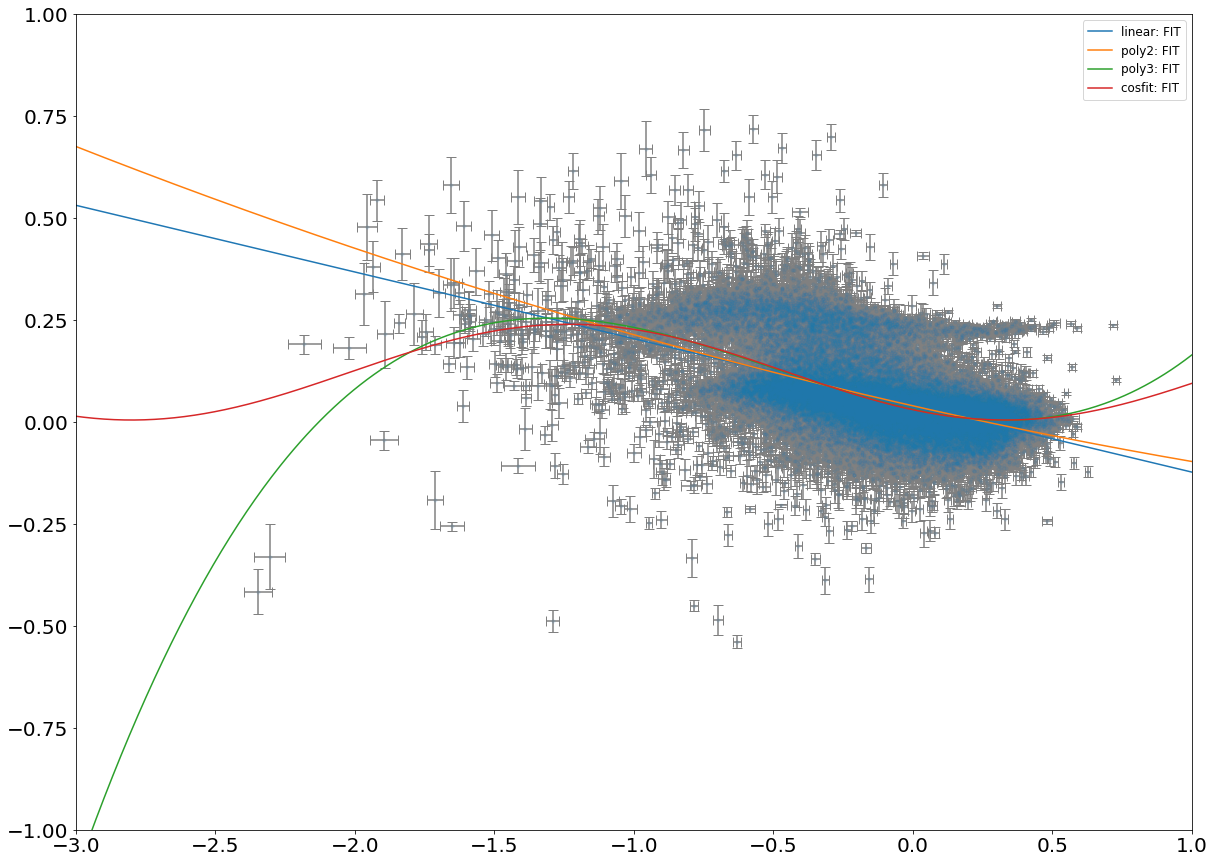

<Figure size 432x288 with 0 Axes>

In [5]:
ct4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['FE_H'] > -100) & (star['O_FE'] > -100) &\
      ((star['GLAT'] < 2) & (star['GLAT'] > -2))
      
cut4 = np.where(ct4)[0]

## create figures

fig_4 = plt.figure(figsize=(20,15)) ## figure plot
ax_4 = fig_4.add_subplot(111)

## plot the raw data and error bars

ax_4.scatter(star['FE_H'][cut4], star['O_FE'][cut4],s=10,alpha=0.1) 
ax_4.errorbar((star['Fe_H'][cut4]),star['O_FE'][cut4], xerr=(star['Fe_H_ERR'][cut4]), yerr=(star['O_FE_ERR'][cut4]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_4.xaxis.set_tick_params(labelsize=20)
ax_4.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_3, intercept_3 = mcFit2(linear, star['Fe_H'][cut4], star['O_FE'][cut4], star['O_FE_ERR'][cut4], star['Fe_H_ERR'][cut4])
print("LINEAR: ",slope_3, intercept_3)

## Polynomial degree 2 Fit: 

param3_1_1, param3_2_1, param3_3_1 = mcFit3(poly2, star['Fe_H'][cut4], star['O_FE'][cut4], star['O_FE_ERR'][cut4], star['Fe_H_ERR'][cut4])
print("POLY2: ", param3_1_1, param3_2_1, param3_3_1)

## Polynomial degree 3 Fit:

param3_1_2, param3_2_2, param3_3_2, param3_4_2 = mcFit4(poly3, star['Fe_H'][cut4], star['O_FE'][cut4], star['O_FE_ERR'][cut4], star['Fe_H_ERR'][cut4])
print("POLY3: ", param3_1_2, param3_2_2, param3_3_2, param3_4_2)

## Cosine Fit: 

param3_1_3, param3_2_3, param3_3_3, param3_4_3 = mcFit4(cosfit, star['Fe_H'][cut4], star['O_FE'][cut4], star['O_FE_ERR'][cut4], star['Fe_H_ERR'][cut4])
print("COSFIT: ", param2_1_3, param2_2_3, param2_3_3, param2_4_3)




# PLOT FITS
x_plot_3 = np.linspace(-5,1,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_4.plot(x_plot_3,linear(x_plot_3, slope_3, intercept_3), label='linear: FIT')
#poly2 fit: 
ax_4.plot(x_plot_3,poly2(x_plot_3, param3_1_1, param3_2_1, param3_3_1), label='poly2: FIT')
#poly3 fit: 
ax_4.plot(x_plot_3,poly3(x_plot_3, param3_1_2, param3_2_2, param3_3_2, param3_4_2), label='poly3: FIT')
#cosine fit:
ax_4.plot(x_plot_3,cosfit(x_plot_3, param3_1_3, param3_2_3, param3_3_3, param3_4_3), label='cosfit: FIT')

ax_4.set_xlim(-3,1)
ax_4.set_ylim(-1,1)

plt.legend(loc='best', fontsize=12)
plt.show()

## save the graph

plt.savefig("FE_H vs. O_FE 2.png") 

## Conclusion:
### The linear and poly2 fits appear to be the best. 

# Set Four: TEFF vs. J - K

LINEAR:  -0.00028247333091455833 2.033258618204803
POLY2:  2.7051762476833502e-08 -0.0005612932278352847 2.7361213209034068
POLY3:  1.3246340044604613e-11 -1.918435801904364e-07 0.0006109256223781419 0.6975119166375958


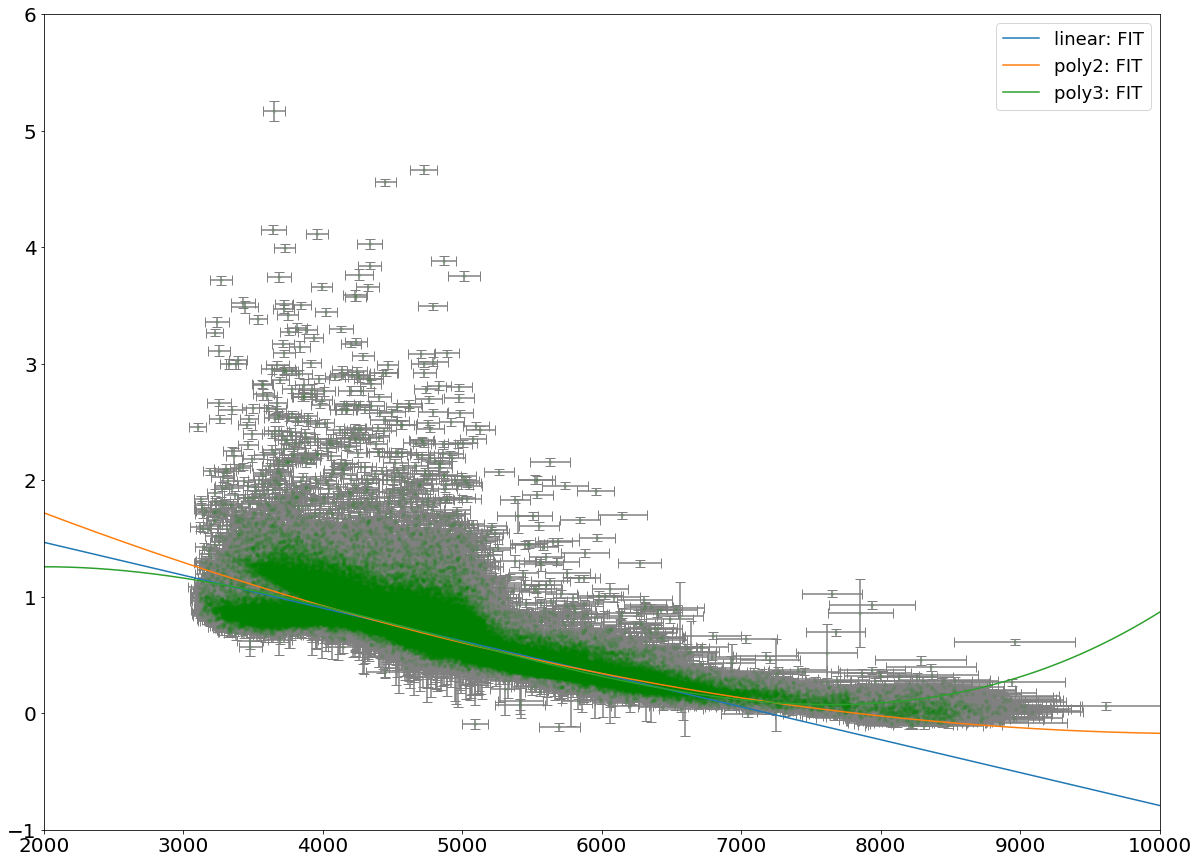

<Figure size 432x288 with 0 Axes>

In [18]:
## create combined error for J - K:

JK = star['J'] - star['K']
JK_ERR = np.sqrt(np.abs(star['J_ERR']**2 + star['K_ERR']**2))

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDED CUTS
ct5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['TEFF'] > 2500) & (JK < 1000) &\
      (JK_ERR < 5) &\
      ((star['GLAT'] < -10) | (star['GLAT'] > 10))
      
      
cut5 = np.where(ct5)[0]

## create figures

fig_5 = plt.figure(figsize=(20,15)) ## figure plot
ax_5 = fig_5.add_subplot(111)



## plot the raw data and error bars

ax_5.scatter(star['TEFF'][cut5], JK[cut5],s=10,alpha=0.1,c='g') 
ax_5.errorbar(star['TEFF'][cut5], JK[cut5], xerr=(star['TEFF_ERR'][cut5]), yerr=(JK_ERR[cut5]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_5.xaxis.set_tick_params(labelsize=20)
ax_5.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_4, intercept_4 = mcFit2(linear, star['TEFF'][cut5], JK[cut5], JK_ERR[cut5], star['TEFF_ERR'][cut5])
print("LINEAR: ",slope_4, intercept_4)

## Polynomial degree 2 Fit: 

param4_1_1, param4_2_1, param4_3_1 = mcFit3(poly2, star['TEFF'][cut5], JK[cut5], JK_ERR[cut5], star['TEFF_ERR'][cut5])
print("POLY2: ", param4_1_1, param4_2_1, param4_3_1)

## Polynomial degree 3 Fit:

param4_1_2, param4_2_2, param4_3_2, param4_4_2 = mcFit4(poly3, star['TEFF'][cut5], JK[cut5], JK_ERR[cut5], star['TEFF_ERR'][cut5])
print("POLY3: ", param4_1_2, param4_2_2, param4_3_2, param4_4_2)

## Log Fit:

#param4_1_3, param4_2_3, param4_3_3, param4_4_3 = mcFit4(logfit, star['TEFF'][cut5], JK[cut5], JK_ERR[cut5], star['TEFF'][cut5], p0 = [-0.36, 24.0, -74000, 4.4])
#print("LOGFIT: ", param4_1_3, param4_2_3, param4_3_3, param4_4_3)

# PLOT FITS
x_plot_4 = np.linspace(2000,10000,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_5.plot(x_plot_4,linear(x_plot_4, slope_4, intercept_4), label='linear: FIT')
#poly2 fit: 
ax_5.plot(x_plot_4,poly2(x_plot_4, param4_1_1, param4_2_1, param4_3_1), label='poly2: FIT')
#poly3 fit: 
ax_5.plot(x_plot_4,poly3(x_plot_4, param4_1_2, param4_2_2, param4_3_2, param4_4_2), label='poly3: FIT')

#ax_5.plot(x_plot_4,logfit(x_plot_4, -0.36, 24.0, -74000, 4.4), label='Logfit: Guess')


#Log fit:
#ax_5.plot(x_plot_4,logfit(x_plot_4, param4_1_3, param4_2_3, param4_3_3, param4_4_3), label='Logfit: FIT')


ax_5.set_xlim(2000,10000)
ax_5.set_ylim(-1, 6)

plt.legend(loc='best', fontsize=18)
plt.show()

## save the graph

plt.savefig("TEFF vs. J-K.png") 

## Conclusion:
### The Poly2 fit appears to be the best fit among those tested. 

# Set Five: GLON vs. VHELIO_AVG

In [ ]:
## establish masks:

ct6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLAT'] > -10) & (star['GLAT'] < 10) &\
      (star['VHELIO_AVG'] < 500) & (star['VHELIO_AVG'] > -500)
      
      
cut6 = np.where(ct6)[0]

## create the figures and graphs:

fig_6 = plt.figure(figsize=(20,15)) ## figure plot
ax_6 = fig_6.add_subplot(111)

## plot the raw data and error bars

ax_6.scatter(star['GLON'][cut6], star['VHELIO_AVG'][cut6],s=10,alpha=0.1) 
ax_6.errorbar(star['GLON'][cut6], star['VHELIO_AVG'][cut6], yerr=(star['VERR'][cut6]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_6.xaxis.set_tick_params(labelsize=20)
ax_6.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_5, intercept_5 = mcFit2(linear, star['GLON'][cut6], star['VHELIO_AVG'][cut6], star['VERR'][cut6], 0)
print("LINEAR: ",slope_5, intercept_5)

## Polynomial degree 2 Fit: 

param5_1_1, param5_2_1, param5_3_1 = mcFit3(poly2, star['GLON'][cut6], star['VHELIO_AVG'][cut6], star['VERR'][cut6], 0)
print("POLY2: ", param5_1_1, param5_2_1, param5_3_1)

## Polynomial degree 3 Fit:

param5_1_2, param5_2_2, param5_3_2, param5_4_2 = mcFit4(poly3, star['GLON'][cut6], star['VHELIO_AVG'][cut6], star['VERR'][cut6], 0)
print("POLY3: ", param5_1_2, param5_2_2, param5_3_2, param5_4_2)

## Cosine Fit: 

param5_1_3, param5_2_3, param5_3_3, param5_4_3 = mcFit4(cosfit, star['GLON'][cut6], star['VHELIO_AVG'][cut6], star['VERR'][cut6], 0, p0 = [100, 0.01, 2.4, 1])
print("COSFIT: ", param5_1_3, param5_2_3, param5_3_3, param5_4_3)




# PLOT FITS
x_plot_5 = np.linspace(-5,400,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_6.plot(x_plot_5,linear(x_plot_5, slope_5, intercept_5), label='linear: FIT')
#poly2 fit: 
ax_6.plot(x_plot_5,poly2(x_plot_5, param5_1_1, param5_2_1, param5_3_1), label='poly2: FIT')
#poly3 fit: 
ax_6.plot(x_plot_5,poly3(x_plot_5, param5_1_2, param5_2_2, param5_3_2, param5_4_2), label='poly3: FIT')
#cosine fit:
ax_6.plot(x_plot_5,cosfit(x_plot_5, param5_1_3, param5_2_3, param5_3_3, param5_4_3), label='cosfit: FIT')

plt.legend(loc='best', fontsize=12)
plt.show()

## save the graph

plt.savefig("GLON vs. VHELIO_AVG.png") 

LINEAR:  -0.008192551235961298 -4.016569037615575
POLY2:  -6.773665667713676e-05 0.014878281552782653 -5.14617882471571
POLY3:  -3.276016741445828e-05 0.017121137457334578 -2.197306393554296 40.35808203593626


## Conclusion:
### The best fits were the cosine fit and the poly3 fit. 

# Set Six: NVISITS vs. VSCATTER

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


LOGFIT:  -0.8 250.0 -500.0 7.0


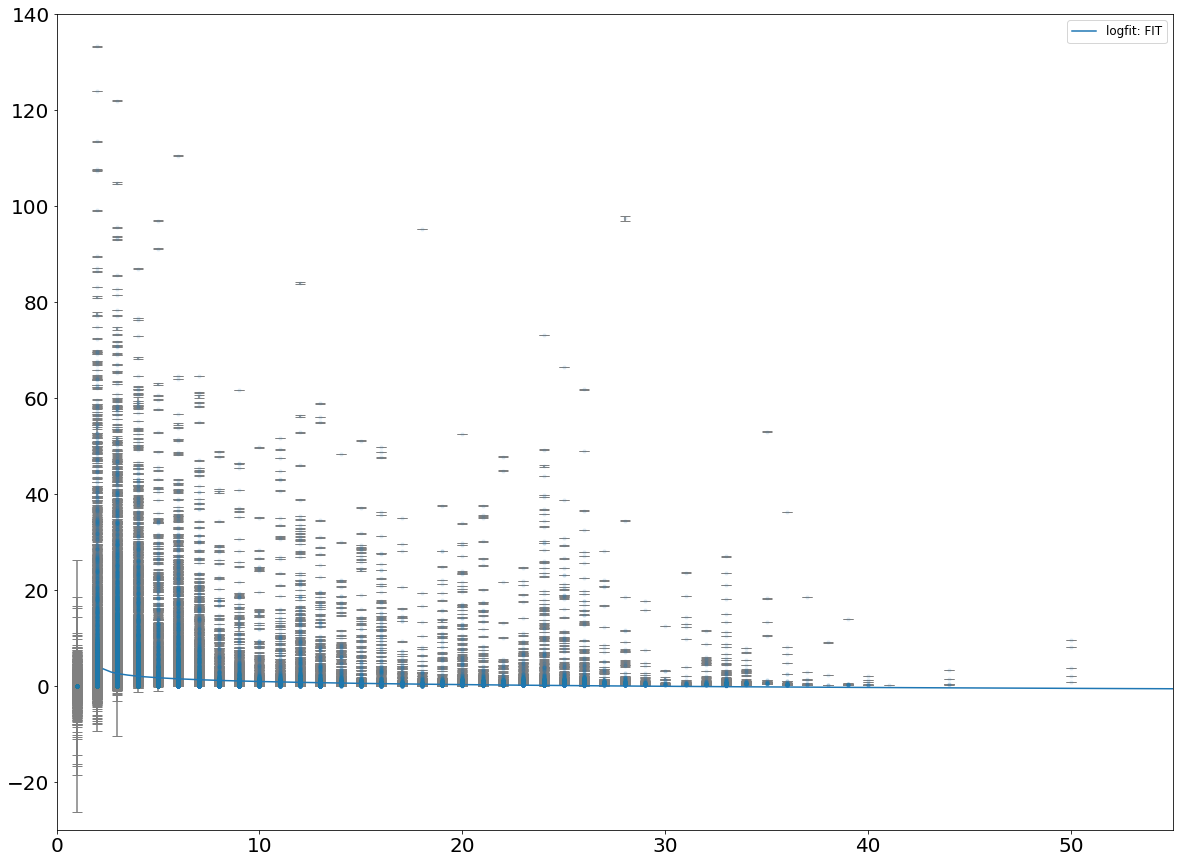

<Figure size 432x288 with 0 Axes>

In [19]:
## create masks:

ct7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['NVISITS'] >= 1)
      
cut7 = np.where(ct7)[0]

## create figures and graphs:

fig_7 = plt.figure(figsize=(20,15)) ## figure plot
ax_7 = fig_7.add_subplot(111)

## plot the raw data and error bars:

ax_7.scatter(star['NVISITS'][cut7], star['VSCATTER'][cut7],s=10,alpha=0.1) 
ax_7.errorbar(star['NVISITS'][cut7], star['VSCATTER'][cut7], yerr=(star['VERR'][cut7]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_7.xaxis.set_tick_params(labelsize=20)
ax_7.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_6, intercept_6 = mcFit2(linear, star['NVISITS'][cut7], star['VSCATTER'][cut7], star['VERR'][cut7], 0)
print("LINEAR: ",slope_6, intercept_6)

## Polynomial degree 2 Fit: 

param6_1_1, param6_2_1, param6_3_1 = mcFit3(poly2, star['NVISITS'][cut7], star['VSCATTER'][cut7], star['VERR'][cut7], 0)
print("POLY2: ", param6_1_1, param6_2_1, param6_3_1)

## Polynomial degree 3 Fit:

param6_1_2, param6_2_2, param6_3_2, param6_4_2 = mcFit4(poly3, star['NVISITS'][cut7], star['VSCATTER'][cut7], star['VERR'][cut7], 0)
print("POLY3: ", param6_1_2, param6_2_2, param6_3_2, param6_4_2)

## Log Fit: 

#param6_1_3, param6_2_3, param6_3_3, param6_4_3 = mcFit4(logfit, star['NVISITS'][cut7], star['VSCATTER'][cut7], star['VERR'][cut7], 0, p0 = [-0.8,250,-500,7])
#print("LOGFIT: ", param6_1_3, param6_2_3, param6_3_3, param6_4_3)




# PLOT FITS
x_plot_6 = np.linspace(-5,400,1000) # X-PLOTING FOR FITS
#linear fit: 
#ax_7.plot(x_plot_6,linear(x_plot_6, slope_6, intercept_6), label='linear: FIT')
#poly2 fit: 
#ax_7.plot(x_plot_6,poly2(x_plot_6, param6_1_1, param6_2_1, param6_3_1), label='poly2: FIT')
#poly3 fit: 
#ax_7.plot(x_plot_6,poly3(x_plot_6, param6_1_2, param6_2_2, param6_3_2, param6_4_2), label='poly3: FIT')
#log fit:
#ax_7.plot(x_plot_6,logfit(x_plot_6, param6_1_3, param6_2_3, param6_3_3, param6_4_3), label='logfit: FIT')


ax_7.set_xlim(0,55)
ax_7.set_ylim(-30,140)

plt.legend(loc='best', fontsize=12)
plt.show()

## save the graph

plt.savefig("NVISITS vs. VSCATTER.png") 

# Set Seven: FE_H vs. NI_FE

LINEAR:  0.010627532180153146 0.021244162651459446
POLY2:  0.012267922746988492 0.02192524795089031 0.021626777915317096


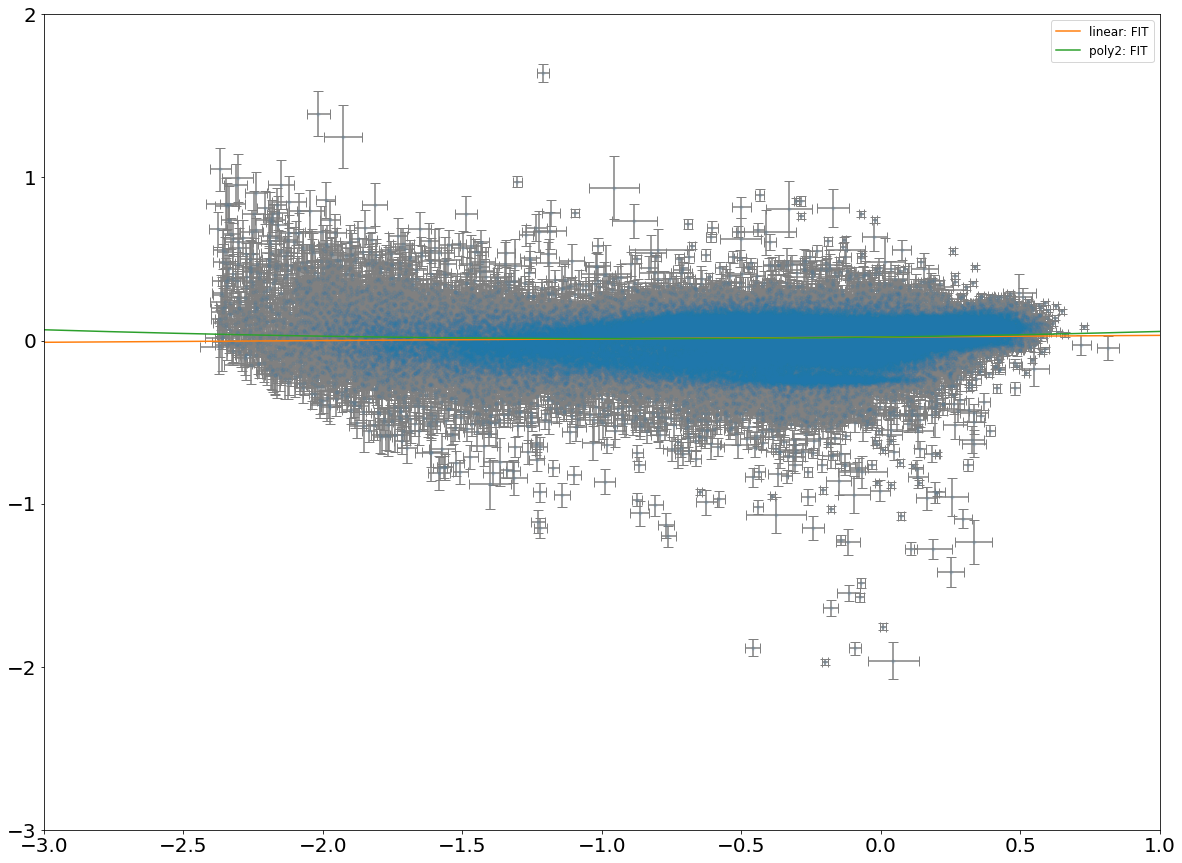

<Figure size 432x288 with 0 Axes>

In [103]:
## create masks

ct8 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['FE_H'] > -1000) & (star['NI_FE'] > -1000)
      
cut8 = np.where(ct8)[0]

## create figures

fig_8 = plt.figure(figsize=(20,15)) ## figure plot
ax_8 = fig_8.add_subplot(111)

## plot the raw data and error bars

ax_8.scatter(star['FE_H'][cut8], star['NI_FE'][cut8],s=10,alpha=0.1) 
ax_8.errorbar((star['Fe_H'][cut8]),star['NI_FE'][cut8], xerr=(star['Fe_H_ERR'][cut8]), yerr=(star['NI_FE_ERR'][cut8]), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_8.xaxis.set_tick_params(labelsize=20)
ax_8.yaxis.set_tick_params(labelsize=20)

## Linear Fit: 

slope_7, intercept_7 = mcFit2(linear, star['Fe_H'][cut8], star['NI_FE'][cut8], star['NI_FE_ERR'][cut8], star['Fe_H_ERR'][cut8])
print("LINEAR: ",slope_7, intercept_7)

## Polynomial degree 2 Fit: 

param7_1_1, param7_2_1, param7_3_1 = mcFit3(poly2, star['Fe_H'][cut8], star['NI_FE'][cut8], star['NI_FE_ERR'][cut8], star['Fe_H_ERR'][cut8])
print("POLY2: ", param7_1_1, param7_2_1, param7_3_1)

## Polynomial degree 3 Fit:

#param7_1_2, param7_2_2, param7_3_2, param7_4_2 = mcFit4(poly3, star['Fe_H'][cut8], star['NI_FE'][cut8], star['NI_FE_ERR'][cut8], star['Fe_H_ERR'][cut8])
#print("POLY3: ", param7_1_2, param7_2_2, param7_3_2, param7_4_2)

## Cosine Fit: 

#param7_1_3, param7_2_3, param7_3_3, param7_4_3 = mcFit4(cosfit, star['Fe_H'][cut8], star['NI_FE'][cut8], star['NI_FE_ERR'][cut8], star['Fe_H_ERR'][cut8])
#print("COSFIT: ", param7_1_3, param7_2_3, param7_3_3, param7_4_3)


# PLOT FITS
x_plot_7 = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit: 
ax_8.plot(x_plot_7,linear(x_plot_7, slope_7, intercept_7), label='linear: FIT')
#poly2 fit: 
ax_8.plot(x_plot_7,poly2(x_plot_7, param7_1_1, param7_2_1, param7_3_1), label='poly2: FIT')
#poly3 fit: 
#ax_8.plot(x_plot_7,poly3(x_plot_7, param7_1_2, param7_2_2, param7_3_2, param7_4_2), label='poly3: FIT')
#cosine fit:
#ax_8.plot(x_plot_7,cosfit(x_plot_7, param7_1_3, param7_2_3, param7_3_3, param7_4_3), label='cosfit: FIT')

ax_8.set_xlim(-3.0,1)
ax_8.set_ylim(-3.0,2)

plt.legend(loc='best', fontsize=12)
plt.show()

## save the graph

plt.savefig("FE_H vs. NI_FE.png") 

## Conclusion:
### There seems to be no need for further test on set seven: The linear fit appears to be the best fit. 